### This book will show how to use easy_sklearn to build clustering models

In [1]:
from sklearn.datasets import load_iris
from easy_sklearn import EasySklearnClustering

In [2]:
ds = load_iris()
X = ds.data
y = ds.target
c = ds.feature_names

In [3]:
esc = EasySklearnClustering()
X_train, X_test, y_train, y_test = esc.split_data(X, y)
esc.n_clusters = 3
esc.set()
esc.fit(X_train, y_train)
esc.score(X_test, y_test)

begin train:------------------------------
('traing data shape', (120, 4))
('training scaler:', 'scale')
('find best model', 'scale', 'KM')
('training scaler:', 'qt')
('find best model', 'qt', 'KM')
('training scaler:', 'maxabs')
('find best model', 'maxabs', 'KM')
('training scaler:', 'minmax')
('training scaler:', 'robust')
('training scaler:', 'norm')
('find best model', 'norm', 'KM')

train result:------------------------------
  model  scaler  train_score  valid_score      time
0    KM    norm    -0.204292    -0.049897  0.050737
1    KM  maxabs    -1.856634    -0.477971  0.027057
2    KM  minmax    -4.845176    -1.129667  0.042767
3    KM      qt    -8.616698    -2.058734  0.030098
4    KM  robust   -49.149781    -9.197763  0.057043
5    KM   scale   -96.881107   -19.104889  0.030016

 group by model
       train_score  valid_score     time
model                                   
KM      -26.925614    -5.336487  0.03962

 group by scaler
        train_score  valid_score      time

-0.07221757563259557

In [4]:
clf = esc.best_model_
print(clf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=9, tol=0.0001, verbose=0)


In [5]:
esc.optimize(scoring='f1_weighted')


optimize:------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


('best parameter ', {})
('The score after optimize', -0.07227950548396933)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.0s finished


In [6]:
y_pred = esc.predict(X_test)


 predict with model=KM and scaler=norm ------------------------------


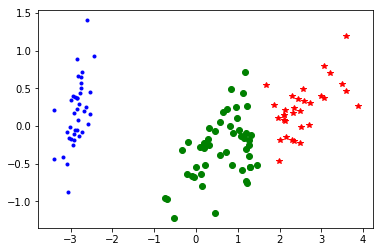

In [7]:
esc.plot_cluster(X_train, clf)